In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

import os

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
dmn_sc = pd.read_csv('adhd_dmn_sc_entropy.csv')

In [2]:
dmn_sc = pd.read_csv('nyu_dmn_cb_sal_sc_entropy.csv')

In [3]:
dmn_sc.head(2)

,ScanID,Age,DX,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,DMNEntropy,CBEntropy,SALEntropy,SCEntropy
0,1000804,7.29,0,40,41,41,112.0,103.0,-13.783709,-14.904604,-14.475912,-12.867685
1,1023964,8.29,3,60,56,48,115.0,125.0,-13.889833,-14.904604,-14.181420,-12.963901


In [4]:
dmn_sc.columns

Index(['ScanID', 'Age', 'DX', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal IQ', 'Performance IQ', 'DMNEntropy', 'CBEntropy', 'SALEntropy',
       'SCEntropy'],
      dtype='object')

In [5]:
dmn_sc.isin([np.inf]).value_counts()

ScanID  Age    DX     ADHD Index  Inattentive  Hyper/Impulsive  Verbal IQ  Performance IQ  DMNEntropy  CBEntropy  SALEntropy  SCEntropy
False   False  False  False       False        False            False      False           False       False      False       False        204
dtype: int64

In [7]:
#dmn_sc['CBEntropy'].astype('float64')
#dmn_sc.dtypes

In [6]:
dmn_sc03 = dmn_sc[dmn_sc['DX']!=2]

In [7]:
dmn_sc03.loc[:,'DX']=dmn_sc03['DX'].apply(lambda x:1 if (x==1) or (x==3) else 0)

/var/folders/64/rp2jr10901n6vdvhsbn1fz7c0000gn/T/ipykernel_95947/3249926031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmn_sc03.loc[:,'DX']=dmn_sc03['DX'].apply(lambda x:1 if (x==1) or (x==3) else 0)


In [8]:
dmn_sc03.head(2)

,ScanID,Age,DX,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,DMNEntropy,CBEntropy,SALEntropy,SCEntropy
0,1000804,7.29,0,40,41,41,112.0,103.0,-13.783709,-14.904604,-14.475912,-12.867685
1,1023964,8.29,1,60,56,48,115.0,125.0,-13.889833,-14.904604,-14.181420,-12.963901


In [9]:
dmn_sc03.shape

(202, 12)

### Phenotype features without Entropy

In [11]:
#Peking
features_noent = dmn_sc03[['Age', 'ADHD_Index',  'Inattentive' , 'Hyper/Impulsive',
                     'Verbal_IQ',  'Performance_IQ']]

labels_noent = dmn_sc03['DX'].values
labels_noent

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [12]:
#NYU
features_noent = dmn_sc03[['Age', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal IQ', 'Performance IQ']]

labels_noent = dmn_sc03['DX'].values
labels_noent

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

In [13]:
features_noent = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features_noent)

train_features_noent, test_features_noent, train_labels1, test_labels1 = train_test_split(
    features_noent, labels_noent, train_size=15, shuffle=False
)

In [14]:
#print(train_features.shape)
print(train_features_noent.shape)

(15, 6)


### Pegasos QSVC without entropy measure

In [15]:
# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000


In [16]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map_noent = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel_noent = FidelityQuantumKernel(feature_map=feature_map_noent)

In [17]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc_noent = PegasosQSVC(quantum_kernel=qkernel_noent, C=C, num_steps=tau)

# training
pegasos_qsvc_noent.fit(train_features_noent, train_labels1)

# testing
pegasos_score_noent = pegasos_qsvc_noent.score(test_features_noent, test_labels1)
print(f"PegasosQSVC classification test score: {pegasos_score_noent}")

PegasosQSVC classification test score: 0.6524064171122995


### SKLearn SVC without entropy

In [18]:
#without entropy
svc1 = SVC()
_ = svc1.fit(train_features_noent, train_labels1)

In [19]:
train_score_c4 = svc1.score(train_features_noent, train_labels1)
test_score_c4 = svc1.score(test_features_noent, test_labels1)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 1.00
Classical SVC on the test dataset:     0.90


### sklearn SVC without entropy

In [20]:
from sklearn import svm
clf1 = svm.SVC(kernel='linear', C = 1.0)
clf1.fit(train_features_noent, train_labels1)

from sklearn.metrics import accuracy_score
accuracy_score(test_labels1, clf1.predict(test_features_noent))

0.9358288770053476

### Phenotype features with Entropy

#### Peking

In [27]:
#Peking
features = dmn_sc03[['Age', 'ADHD_Index',  'Inattentive' , 'Hyper/Impulsive',
                     'Verbal_IQ',  'Performance_IQ',  'DMN_Entropy',  'SC_Entropy']] #'SALEntropy',

labels = dmn_sc03['DX'].values


#### NYU - 204

In [21]:
features = dmn_sc03[['Age', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
       'Verbal IQ', 'Performance IQ', 'DMNEntropy', 'SALEntropy','SCEntropy']]

labels = dmn_sc03['DX'].values
labels

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

#### Scaling and train-test split

In [22]:
features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=15, shuffle=False
)

In [ ]:

#dont use this
'''features = MinMaxScaler().fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, 
)'''

### Pegasos QSVC with Entropy

In [23]:
# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000



In [24]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [25]:
from qiskit_machine_learning.algorithms import PegasosQSVC

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(train_features, train_labels)

# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
print(f"PegasosQSVC classification test score with entropy: {pegasos_score}")

PegasosQSVC classification test score with entropy: 0.8609625668449198


### sklearn SVC with entropy

In [41]:
clf.fit(train_features, train_labels)

SVC(kernel='linear')

In [42]:
accuracy_score(test_labels, clf.predict(test_features))

1.0

### Visualization

In [53]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [55]:
labels

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

In [56]:
X=features[:,:2]
y=0,1
plot_svc(pegasos_qsvc, X, y)

ValueError: x_vec and y_vec have incompatible dimensions.
x_vec has 2 dimensions, but y_vec has 9.

In [45]:
grid_step = 0.2
margin = 0.2
grid_x, grid_y = np.meshgrid(
    np.arange(-margin, np.pi + margin, grid_step), np.arange(-margin, np.pi + margin, grid_step)
)

In [51]:
#meshgrid_features = np.column_stack((grid_x.ravel(), grid_y.ravel()))
meshgrid_colors = pegasos_qsvc.predict(features[:2])

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
meshgrid_colors = meshgrid_colors.reshape(grid_x.shape)
plt.pcolormesh(grid_x, grid_y, meshgrid_colors, cmap="RdBu", shading="auto")

plt.scatter(
    train_features[:2, 0][train_labels == 0],
    train_features[:2, 1][train_labels == 0],
    marker="s",
    facecolors="w",
    edgecolors="r",
    label="A train",
)
plt.scatter(
    train_features[:2, 0][train_labels == 1],
    train_features[:, 1][train_labels == 1],
    marker="o",
    facecolors="w",
    edgecolors="b",
    label="B train",
)

plt.scatter(
    test_features[:, 0][test_labels == 0],
    test_features[:, 1][test_labels == 0],
    marker="s",
    facecolors="r",
    edgecolors="r",
    label="A test",
)
plt.scatter(
    test_features[:, 0][test_labels == 1],
    test_features[:, 1][test_labels == 1],
    marker="o",
    facecolors="b",
    edgecolors="b",
    label="B test",
)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.title("Pegasos Classification")
plt.show()

ValueError: cannot reshape array of size 2 into shape (18,18)

<Figure size 500x500 with 0 Axes>

In [48]:
h=0.02

# create a mesh to plot in
x_min, x_max = features[:2].min() - 1, features[:2].max() + 1
y_min, y_max = labels.min(), labels.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



In [49]:
print(xx.ravel().shape)
yy.ravel().shape



(12300,)


(12300,)

ValueError: x_vec and y_vec have incompatible dimensions.
x_vec has 2 dimensions, but y_vec has 9.

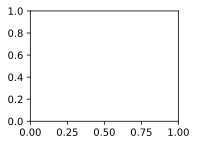

In [50]:
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = pegasos_qsvc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles[i])